<a href="https://colab.research.google.com/github/williamokomba/Data-science-core-week-6-IP/blob/main/DSC_week_6_Ip_william.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Moringa Data science core week 6 Independent project: William**

##*1.0* Defining the Question

**Dataset provided**

1. The dataset and glossary [link](https://drive.google.com/open?id=1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc)
2.   Explanation and history of the rankings [link](https://en.wikipedia.org/wiki/FIFA_World_Rankings)
3. An explanation of the ranking procedure [link](https://www.fifa.com/fifa-world-ranking/procedure/men.html)
4. Some features available on the FIFA ranking [link](https://www.fifa.com/fifa-world-ranking/ranking-table/men/index.html)

###1.1 Specifying the data analytic question
*   predict the goals scored by away team, home team and figure out the home team percepective if the home team is win, lose or draw.


###1.2 Defining the metric for success

Since the problem we are tackling is a regression problem,use polymonial regression and for classification problem, we will use classification reports and confusion matrices as well as accuracy to measure the success of the models used.

### 1.3 Understanding the Context
Footbal is much loved sport accross the world, from basic demographic data, we can predict the team ranking based on both home-score and away-scores.

### 1.4 Recording the Experimental Design

- load libraries and dataset
- clean dataset:
    - deal with duplicate and/or missing values
    - deal with outliers, where necessary
    - deal with other anomalies in the data, where necessary
- carry out exploratory data analysis
- carry out feature engineering
- carry out modeling
    - tune hyperparameters
    - feature selection
    - alternative models
- summarize and provide recommendations
- challenge the solution

### 1.5 Assessing the Relevance of the Data
while data provided is relevant it had irrelevant features which affected the result of the modelling.

## 2.Loading and reading Our Datasets

In [5]:
# Importing standard libraries
#
# load pandas
import pandas as pd               # library for data manipulation and analysis
#
# load numpy
import numpy as np                # library for performin scientific computations
#
# load matplotlib.pyplot
import matplotlib.pyplot as plt   # library for creating basic visualisations
#
# load Seaborn
import seaborn as sns             # library for creating rich data visualisations

In [6]:
# Loading the result Dataset 
#
result_df=pd.read_csv("/content/results.csv")


In [7]:
# Loading the fifa ranking Dataset
#
fifa_ranking=pd.read_csv("/content/fifa_ranking.csv")

## 3. Checking the Data

In [8]:
# Determining the no. of records in our result dataset
#
result_df.shape

(40839, 9)

**observation** our result dataset has 40839 records and 9 varables.

In [9]:
# Determining the no. of records in our fifa ranking dataset
#
fifa_ranking.shape

(57793, 16)

**obsevation** fifa ranking dataset has 57793 records and 16 varables

In [10]:
# Previewing the top of our fifa result dataset
#
result_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
# Previewing the bottom of our fifa result dataset
#
result_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


**observation** the fifa result dataset is uniform from top to the bottom.

In [12]:
# Previewing the top of our fifa dataset
#
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [13]:
# Previewing the bottom of our fifa dataset
#
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


**observation** fifa ranking dataset has uniform values from top to the bottom.

In [14]:
# Checking whether each column of result dataset has an appropriate datatype
#
result_df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

**observation** the dataype corresponds to the variables appropriately

In [15]:
# Checking whether each column of result dataset has an appropriate datatype
#
fifa_ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

**observation** the datatype corresponds to the variables appropriately

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important

### a. Validation

In [16]:
#validy for result dataset
#
result_df.country.unique

<bound method Series.unique of 0        Scotland
1         England
2        Scotland
3         England
4        Scotland
           ...   
40834       Samoa
40835       Samoa
40836       Egypt
40837       India
40838       Samoa
Name: country, Length: 40839, dtype: object>

**observation** the country names are correct. thus the dataset is valid.

In [17]:
#validity for fifa result dataset
#
fifa_ranking.rank_date.unique

<bound method Series.unique of 0        1993-08-08
1        1993-08-08
2        1993-08-08
3        1993-08-08
4        1993-08-08
            ...    
57788    2018-06-07
57789    2018-06-07
57790    2018-06-07
57791    2018-06-07
57792    2018-06-07
Name: rank_date, Length: 57793, dtype: object>

**observation** the date conforms with the international standard.

## 5. Tidying the Dataset 

###tidying dataset 1






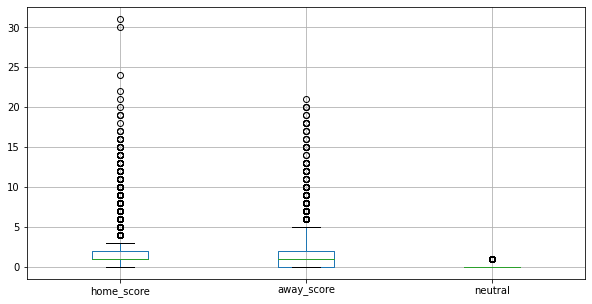

In [18]:
#5.1a data cleaning for result dataset
#
# Checking for Outliers
#
result_df1 = result_df
plt.figure(figsize = (10, 5))
result_df1.boxplot()
plt.show()

**observation** We see that the 'home_score' and 'away_score' variables has a lot of outliers. However, we cannot remove them because they reflect real life scores, and therefore provide useful insights. However, it is worth keeping in mind that polymonial and  logistic regression assumes that the dataset it will be fitted on has few to no outliers.

In [19]:
#5.1b concise summary about dataset
#
result_df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**observation**  all the datatypes are appropriate and all variables has 40839 records, this is a hind that there is no missing values.

In [20]:
#5.1c Identifying the Missing Data
#
result_df1.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

**observartion** there is no missing values in result dataset.

In [21]:
#5.1d confirming no  Missing Data
#
result_df1.isna().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

**observation** no missing value is confirmed.

In [22]:
#5.1e checking for duplicates in result dataset.
#
result_df1.duplicated().sum()


0

In [23]:
#5.1f confirming no duplicates in result dataset
#
result_df1.duplicated().any()


False

**observation**: there is no duplicated values.

In [24]:
#5.1g converting the date column to type datetime
 
import datetime
result_df1['date'] = pd.to_datetime(result_df1['date'])
#
# splitting the datetime column into month and year
result_df1['year'], result_df1['month'] = result_df1['date'].dt.year, result_df1['date'].dt.month

**observation** this ensure the date is in the right format and datatype.

In [25]:
#dataset overview 
#
result_df1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3


In [26]:
#5.1h dropping unnessary colunms
#
#Dropping unnecesary columns
result_df1.drop(['date','city','country','neutral'], axis=1, inplace=True)
result_df1.head()

,home_team,away_team,home_score,away_score,tournament,year,month
0,Scotland,England,0,0,Friendly,1872,11
1,England,Scotland,4,2,Friendly,1873,3
2,Scotland,England,2,1,Friendly,1874,3
3,England,Scotland,2,2,Friendly,1875,3
4,Scotland,England,3,0,Friendly,1876,3


**observation** we dropped the colunms since they will not be used on our analysis.

In [27]:
#5.1i standardizing variable names for readability
#
result_df1.columns = result_df1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
result_df1.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'year', 'month'],
      dtype='object')

**Observation**: this ensure the variables have standard format. this helps in data analysis

### tidying dataset 2

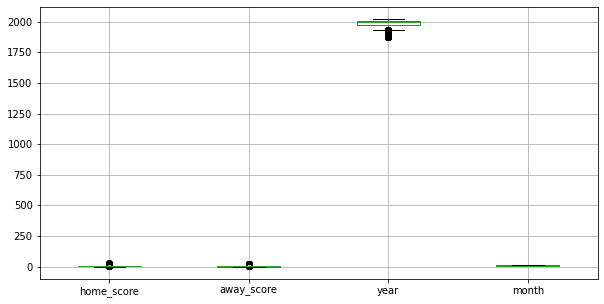

In [28]:
#5.2a data cleaning for fifa dataset
#
# Checking for Outliers
#
fifa_ranking1 = fifa_ranking
#
plt.figure(figsize = (10, 5))
result_df1.boxplot()
plt.show()

observation We see that the 'home_score' and 'away_score' variables has a lot of outliers. However, we cannot remove them because they reflect real life scores

In [29]:
#5.2b concise summary about fifa dataset
#
fifa_ranking1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

**obersation** this is a clue there is no null values since all the variables has 57793 records and the data type is appropriate.

In [30]:
#5.2c Identifying the Missing Data
#
fifa_ranking1.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

**observation**: there is no missing values.




In [31]:
#checking for duplicates.
#
fifa_ranking1.duplicated().sum()

37

**observation** there are 37 missing values

In [32]:
#removing duplicates
#
fifa_ranking1.drop_duplicates(keep='first', inplace = True)
#
# confirming the duplicates have been removed
#
fifa_ranking1.duplicated().any()

False

**observation** all the duplicates have been removed.

In [33]:
# #converting the rank_date column to type datetime
#
fifa_ranking1['rank_date'] = pd.to_datetime(fifa_ranking1['rank_date'])

In [34]:
# splitting the datetime column into month and year
#
fifa_ranking1['year'], fifa_ranking1['month'] = fifa_ranking1['rank_date'].dt.year, fifa_ranking1['rank_date'].dt.month
#
#previeving the dataset
fifa_ranking1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993,8


In [35]:
#confirming the new dataset colunm types
#
fifa_ranking1.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
year                                int64
month                               int64
dtype: object

In [36]:
# dropping unnecessary columns
#
fifa_ranking1.drop(['country_abrv','confederation','cur_year_avg','cur_year_avg_weighted',
           'last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted',
           'three_year_ago_avg','three_year_ago_weighted','confederation', 'rank_date', 'total_points','previous_points', 'rank_change'], axis = 1, inplace = True)

**observation** we dropped the colunms since they will not be used on our analysis.

In [37]:
#previewing the dataset
fifa_ranking1.head()

,rank,country_full,year,month
0,1,Germany,1993,8
1,2,Italy,1993,8
2,3,Switzerland,1993,8
3,4,Sweden,1993,8
4,5,Argentina,1993,8


### merging the tables.

In [38]:
#a. merging the two datasets on the home team
#
merged_home = pd.merge(fifa_ranking1, result_df1, how='inner', left_on=['country_full','year','month'], right_on = ['home_team','year', 'month'] )
merged_home.head()
#
#The rank is renamed to home_rank
merged_home.rename({'rank': 'home_rank'}, axis = 1, inplace  = True)
#
#preview
merged_home.head()

,home_rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification
3,5,Argentina,1993,8,Argentina,Paraguay,0,0,FIFA World Cup qualification
4,8,Brazil,1993,8,Brazil,Mexico,1,1,Friendly


**observation** we then merged the two tables on home team to come up with home team table.

In [39]:
#b. merging the two datasets on the away team
#
merged_away= pd.merge(fifa_ranking1, result_df1, how='inner', left_on=['country_full','year','month'], right_on = ['away_team','year', 'month'] )
merged_away.head()

#The rank is renamed to away_rank.
merged_away.rename({'rank' : 'away_rank'}, axis = 1, inplace = True)
#
#preview
merged_away.head()

,away_rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament
0,3,Switzerland,1993,8,Sweden,Switzerland,1,2,Friendly
1,5,Argentina,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification
2,5,Argentina,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification
3,5,Argentina,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification
4,8,Brazil,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification


**observation** we then merged the two tables on away team to come up with away team table.

In [40]:
#we drop the unnecessary columns in fifa_away dataset, and put the choosen columns in a new dataframe.

merged_away1 =merged_away[['away_team','away_rank','year','month']]
merged_away1.head()

,away_team,away_rank,year,month
0,Switzerland,3,1993,8
1,Argentina,5,1993,8
2,Argentina,5,1993,8
3,Argentina,5,1993,8
4,Brazil,8,1993,8


observation: i created the dataframe with only needed variables.

In [41]:
#final merge. way_teams_ranks will be merged with new_merged_ homes on the away team and year and month.
#
final_merge = pd.merge(merged_home, merged_away1, how = 'inner', left_on = ['year', 'month', 'away_team'], right_on = ['year', 'month', 'away_team'])

final_merge.head()

,home_rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,away_rank
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,3
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,12
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70
3,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70
4,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70


In [42]:
#checking the shape
#
final_merge.shape

(28439, 10)

**obsrevation** merged dataset has 28439 records and 10 variables.






In [43]:
#creating a function to be used to create column for win, loss and win values.
#
def get_status(row):
  if (row["home_score"] > row["away_score"]):
    return "Win"
  elif (row["home_score"] == row["away_score"]):
    return "Draw"
  else :
    return "Loss"

In [44]:
# Applying the result function to the dataframe
#
final_merge["status"] =final_merge.apply(lambda x:get_status(x), axis=1)

In [45]:
#getting a function for tournament type
#
def get_tournament(x):
  if x == 'FIFA World Cup qualification':
    return 'FIFA World Cup'
  if x == 'Friendly':
    return 'Friendly'
  else:
    return 'other'

In [46]:
# Applying the result function to the dataframe
#
final_merge['tournament_type'] = final_merge.tournament.apply(lambda x:get_tournament(x))
final_merge.head()

,home_rank,country_full,year,month,home_team,away_team,home_score,away_score,tournament,away_rank,status,tournament_type
0,4,Sweden,1993,8,Sweden,Switzerland,1,2,Friendly,3,Loss,Friendly
1,4,Sweden,1993,8,Sweden,France,1,1,FIFA World Cup qualification,12,Draw,FIFA World Cup
2,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70,Win,FIFA World Cup
3,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70,Win,FIFA World Cup
4,5,Argentina,1993,8,Argentina,Peru,2,1,FIFA World Cup qualification,70,Win,FIFA World Cup


In [47]:
# Dropping the unecessary tournament columns.
#
final_merge.drop(['tournament', 'month','country_full'], axis = 1, inplace = True)


In [48]:
#renaming the colunms
#
final_merge.rename({'home_rank':'home_team_rank','home_score' : 'home_team_score', 'away_score': 'away_team_score', 'away_rank': 'away_team-rank'}, axis = 1, inplace = True)

In [49]:
# our final merged dataset after adjustments
#
final_merge.head()

,home_team_rank,year,home_team,away_team,home_team_score,away_team_score,away_team-rank,status,tournament_type
0,4,1993,Sweden,Switzerland,1,2,3,Loss,Friendly
1,4,1993,Sweden,France,1,1,12,Draw,FIFA World Cup
2,5,1993,Argentina,Peru,2,1,70,Win,FIFA World Cup
3,5,1993,Argentina,Peru,2,1,70,Win,FIFA World Cup
4,5,1993,Argentina,Peru,2,1,70,Win,FIFA World Cup


###tidying dataset for final merged data

In [50]:
#checking the shape
#
final_merge1= final_merge
final_merge1.shape

(28439, 9)

**observation**: it has 28439 records and 9 variables

In [51]:
#checking for missing values
#
final_merge1.isna().sum()

home_team_rank     0
year               0
home_team          0
away_team          0
home_team_score    0
away_team_score    0
away_team-rank     0
status             0
tournament_type    0
dtype: int64

**observation**: has no missing values

In [52]:
#checking for duplicates
#
final_merge1.duplicated().sum()

11577

In [53]:
#dropping duplicates
#
#removing duplicates
#
final_merge1.drop_duplicates(keep='first', inplace = True)
#
#confirming no duplicates
#
final_merge1.duplicated().any()


False

In [54]:
final_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16862 entries, 0 to 28438
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   home_team_rank   16862 non-null  int64 
 1   year             16862 non-null  int64 
 2   home_team        16862 non-null  object
 3   away_team        16862 non-null  object
 4   home_team_score  16862 non-null  int64 
 5   away_team_score  16862 non-null  int64 
 6   away_team-rank   16862 non-null  int64 
 7   status           16862 non-null  object
 8   tournament_type  16862 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.3+ MB


**observation**: data type is appropriate

In [55]:
# standardizing variable names for readability
#
final_merge1.columns = final_merge1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#
final_merge1.columns

Index(['home_team_rank', 'year', 'home_team', 'away_team', 'home_team_score',
       'away_team_score', 'away_team-rank', 'status', 'tournament_type'],
      dtype='object')

## Exploratory Data Analysis

### Univariate analysis

We will now perform univariate analysis. This is a type of analysis done only one variable. This type of analysis will be helpful in understanding the characteristics of each variables.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


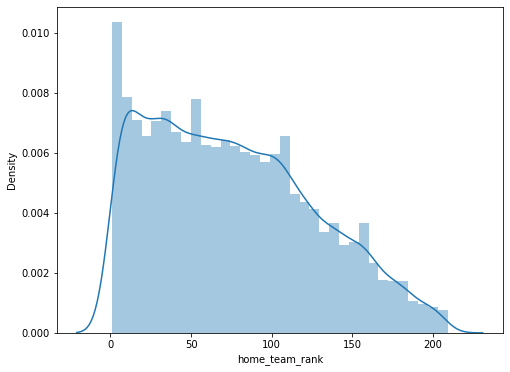

In [56]:
# univariate analysis: home-team_rank variable distplot
#
plt.figure(figsize = (8, 6))
sns.distplot(final_merge1.home_team_rank);

**Observation**: The 'age' variable is not normally distributed. It is skewed to the right.

<Figure size 576x432 with 0 Axes>

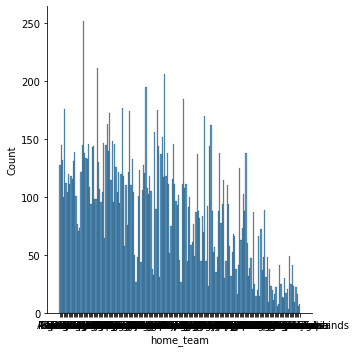

In [57]:
# univariate analysis: home_team variable bar graph
#
plt.figure(figsize = (8, 6))
sns.displot(final_merge1['home_team'])

This variable is not distribution.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


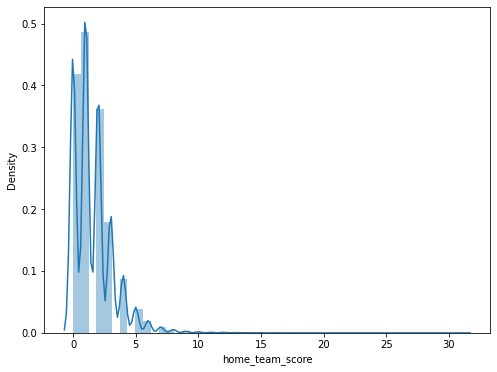

In [58]:
# univariate analysis: home-team_score variable distplot
#
plt.figure(figsize = (8, 6))
sns.distplot(final_merge1.home_team_score);

**Observation**:From the above histograms, it can be observed that the plots are skewed to the right, which means that the mean is less than both the median and mode of goals scored

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


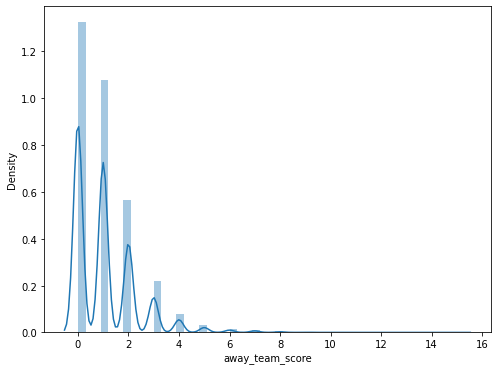

In [59]:
# univariate analysis: away-team_score variable distplot
#
plt.figure(figsize = (8, 6))
sns.distplot(final_merge1.away_team_score);

**observation**: From the above histograms, it can be observed that the plots are skewed to the right, which means that the mean is less than both the median and mode of goals scored

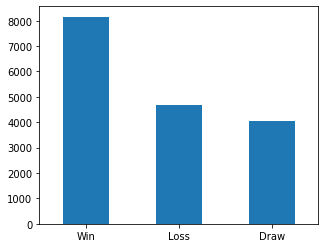

In [60]:
# univariate analysis: status variable
plt.figure(figsize = (5, 4))
final_merge1.status.value_counts().plot(kind = 'bar', rot = 0);

**observation**: win variable had more records.

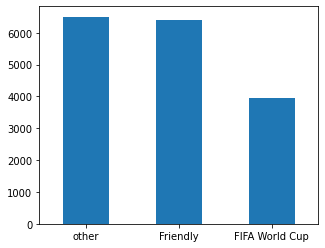

In [61]:
# univariate analysis: tournament_type variable
#
plt.figure(figsize = (5, 4))
final_merge1.tournament_type.value_counts().plot(kind = 'bar', rot = 0);

**observation** others variable had more records.

### Bivariate analysis

We now perform bivariate analysis, which is a type of analysis that involves two variables. The main objective is to understand the relationships between these two types of variables

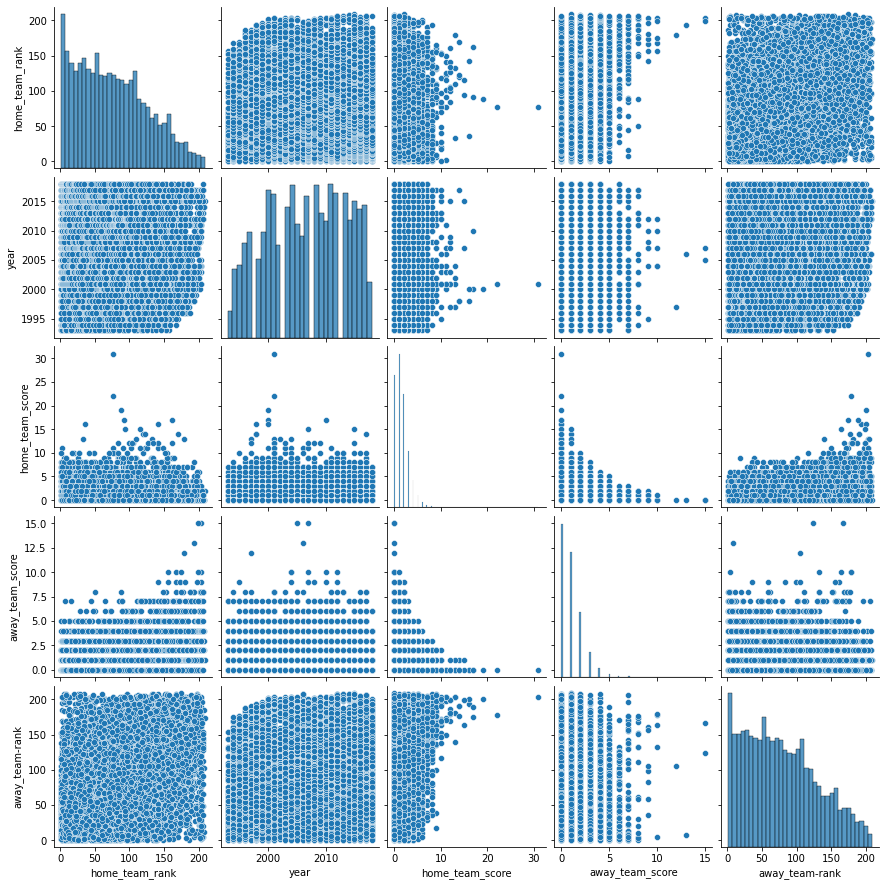

In [62]:
# Plotting pairplot for merged dataset
#
sns.pairplot(final_merge1)


**observation**: this shows that most of the variablse are not correlated.

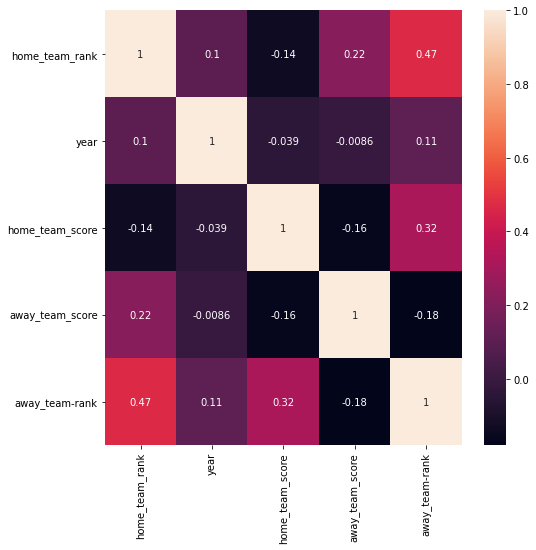

In [63]:
# heatmap to visualise features with linear relationships 
plt.figure(figsize = (8, 8))
sns.heatmap(final_merge1.corr(), annot=True, );


**observation**: there is weak relationship between variables.

##Feature engineering

In [64]:
#getting the datset summary
#
final_merge1.describe()

,home_team_rank,year,home_team_score,away_team_score,away_team-rank
count,16862.000000,16862.000000,16862.000000,16862.000000,16862.000000
mean,76.023248,2006.498873,1.604673,1.069624,78.853042
std,50.852071,6.803962,1.616018,1.245983,52.005515
min,1.000000,1993.000000,0.000000,0.000000,1.000000
25%,33.000000,2001.000000,0.000000,0.000000,35.000000
50%,70.000000,2007.000000,1.000000,1.000000,72.000000
75%,112.000000,2012.000000,2.000000,2.000000,115.000000
max,209.000000,2018.000000,31.000000,15.000000,209.000000


In [65]:
# label encoding.

#label encoding 'tournament'
# label encoding.
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'tournament type'. 
final_merge1['tournament_type'] = label_encoder.fit_transform(final_merge1['tournament_type']) 
#
#preview
#
final_merge1.head()
#
# friendly = 1
# fifa world cup = 0
#others = 2

,home_team_rank,year,home_team,away_team,home_team_score,away_team_score,away_team-rank,status,tournament_type
0,4,1993,Sweden,Switzerland,1,2,3,Loss,1
1,4,1993,Sweden,France,1,1,12,Draw,0
2,5,1993,Argentina,Peru,2,1,70,Win,0
5,19,1993,Colombia,Peru,4,0,70,Win,0
8,67,1993,Paraguay,Peru,2,1,70,Win,0


In [66]:
# Encode labels in column 'status'. 
final_merge1['status'] = label_encoder.fit_transform(final_merge1['status']) 
#
#preview
#
final_merge1.head()
#
# loss = 1
# draw = 0
#win = 2


,home_team_rank,year,home_team,away_team,home_team_score,away_team_score,away_team-rank,status,tournament_type
0,4,1993,Sweden,Switzerland,1,2,3,1,1
1,4,1993,Sweden,France,1,1,12,0,0
2,5,1993,Argentina,Peru,2,1,70,2,0
5,19,1993,Colombia,Peru,4,0,70,2,0
8,67,1993,Paraguay,Peru,2,1,70,2,0


**observation**:status variable has been encoded.

 ## modeling



In [109]:
# importing libraries
#
import scipy as sp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix

### approach 1: Using Polynomial regression.

Create a model that can predict how many goals the home team scores

In [75]:
# Selecting variables relevant to the reasearch question
#
model1 = final_merge1[['home_team_score','away_team_score',	'tournament_type', 'home_team_rank', 'away_team-rank']]

# Previewing the first five rows of the dataset
#
model1.head()

,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
0,1,2,1,4,3
1,1,1,0,4,12
2,2,1,0,5,70
5,4,0,0,19,70
8,2,1,0,67,70


In [76]:
#1. checking for multicollinearity
# Let's display the correlations between the variables
corr = model1.corr()

corr

,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
home_team_score,1.000000,-0.163737,-0.027374,-0.135345,0.318861
away_team_score,-0.163737,1.000000,0.004693,0.221738,-0.179911
tournament_type,-0.027374,0.004693,1.000000,0.081071,0.098640
home_team_rank,-0.135345,0.221738,0.081071,1.000000,0.469376
away_team-rank,0.318861,-0.179911,0.098640,0.469376,1.000000


**observation :**it shows the relationship between variables. The coefficient of 1 across the diagonal shows that a variable is perfectly correlated to itself. 

the above will be used to compute the VIF (Variance Inflation Factor) score for each variable, by finding the inverse matrix of the correlations matrix.

In [77]:
#2.computing Variance Inflation Factor(VIF) score
#
vif_score=pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)
vif_score

,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
home_team_score,1.262705,-0.008887,0.058974,0.462435,-0.627099
away_team_score,-0.008887,1.180261,-0.010901,-0.466253,0.435099
tournament_type,0.058974,-0.010901,1.014257,-0.019394,-0.111709
home_team_rank,0.462435,-0.466253,-0.019394,1.635571,-0.997120
away_team-rank,-0.627099,0.435099,-0.111709,-0.997120,1.757280


**observation** the above will be plotted on heatmap for easy interpretation



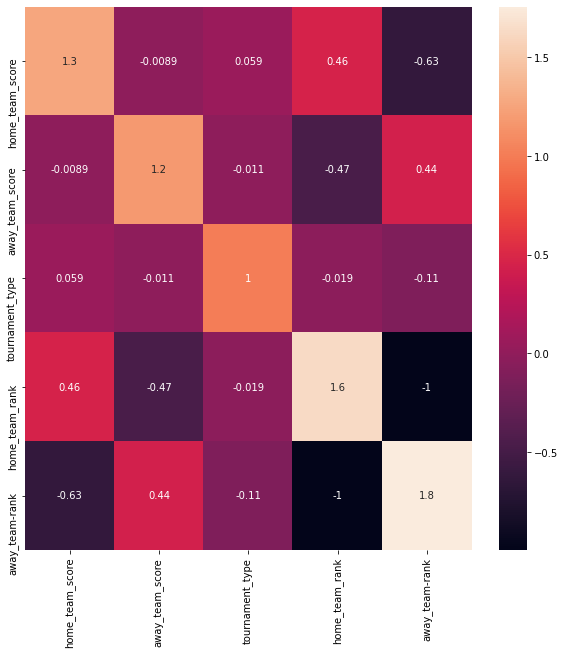

In [78]:
# plotting Vif score on heatmap
#
plt.figure(figsize = (10, 10))
sns.heatmap(vif_score, annot = True)
plt.show()


**interpretaion** : the VIF score for home_team_score is 1.3, away_team_score is 1.2, tournament type 1,home team rank is 1.6 and away teamrank is 1.8. All scores are under 5, therefore there is no multicollinearity (No 2 variables are colinear).

In [79]:
#Creating the polynomial model1
#
#importing libraries to be used
#
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [80]:
# dataset overview
#
model1.head()

,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
0,1,2,1,4,3
1,1,1,0,4,12
2,2,1,0,5,70
5,4,0,0,19,70
8,2,1,0,67,70


In [83]:
# dividing our dataset into features (X) and target (y)
#
X = model1.drop(columns = ['home_team_score']).values
y = model1['home_team_score'].values


In [84]:
#shape

print(X.shape)
print(y.shape)

(16862, 4)
(16862,)


In [88]:
# splitting our dataset into 80-20 train-test sets
#
from sklearn.model_selection import train_test_split 
#
#assigning variable to train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size =.2)

**interpretaion**:
*   x_train: independent/input feature for training the model
*   y_train: dependent/ target/ output feature for training the model
*   x_test: independent/input feature for testing the model, will be used to predict the output value
*   y_test: original depedent/output values of t-test, we'll compare this values with our predicted values to check the performance of our build model.
*   train_ size= 80% of the data will go for train set will 20% for test. set.
*   random_state= this fix the split i.e there will be the same split each time you ran the code.



In [102]:
# Standardising the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**observation**: this ensure the train and test variable are equal

building the model

In [125]:
# Fitting the polynomial features to the X_train and X_test
#
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
#
# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#
# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.4273716964995309


**observation**: The lower the RMSE of a model, the better the performance of the model. Therefore, this model is fairly good in making predictions

In [129]:
# making comparison
compare = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred}) 
print(compare.head())
compare.describe()

   Actual  Predicted
0       2   1.372616
1       3   1.571969
2       0   1.512368
3       0   1.689499
4       0   1.566344


,Actual,Predicted
count,3373.000000,3373.000000
mean,1.644530,1.614144
std,1.636874,0.783015
min,0.000000,0.056166
25%,0.000000,1.089981
50%,1.000000,1.465531
75%,2.000000,1.969621
max,19.000000,5.994765


In [130]:
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

In [132]:
# statistical description
residual = pd.DataFrame(residuals).describe()
#
# mean 
residuals.mean()

-0.030386537867448275

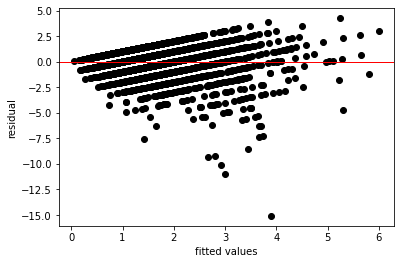

In [137]:
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

**observation**: This does not look too bad: our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns hence no heteroskedasticity. Let's be thorough though, and perform a heteroskedasticity test.

For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [144]:
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

1148.5258286878886
the variances are homogeneous!


### approach 2: Using Polynomial regression.

Create a model that can predict how many goals the away team scores

In [152]:

# Selecting variables relevant to the reasearch question
#
model2= final_merge1[['home_team_score',	'away_team_score',	'tournament_type', 'home_team_rank', 'away_team-rank']]
#
#previewing model 2
#
model2.head()



,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
0,1,2,1,4,3
1,1,1,0,4,12
2,2,1,0,5,70
5,4,0,0,19,70
8,2,1,0,67,70


In [156]:
# dividing our dataset into features (n) and target (p)
#
n = model2.drop(columns = ['away_team_score']).values
p = model2['away_team_score'].values

In [157]:
# Performing Data Preprocessing
#
# splitting our dataset into 80-20 train-test sets
#
from sklearn.model_selection import train_test_split 
#
#assigning variable to train test split output

n_train, n_test, p_train, p_test = train_test_split(n, p, random_state = 10, test_size = 0.2)

In [165]:
# fitting the polynomial regressor 
#
# fitting the polynomial regressor 
pol_reg = PolynomialFeatures(degree = 2)
n_train_poly = pol_reg.fit_transform(n_train)
n_test_poly = pol_reg.fit_transform(n_test)
pol_reg.fit(n_train_poly, p_train)

pol_regressor = LinearRegression()
pol_regressor.fit(n_train_poly, p_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
# Prints y-intercept
print(pol_regressor.intercept_)

# Prints the beta coefficients in order
print(pol_regressor.coef_)

1.0429928064830032
[ 0.00000000e+00  8.03829397e-02  9.43354371e-04  5.91452393e-03
 -1.18892989e-02  1.32173934e-04 -7.23033823e-04 -5.64791095e-04
 -3.89948345e-04  3.92651827e-02 -6.83665528e-04 -1.56551101e-06
  5.22501116e-05 -4.28456821e-05  4.15842192e-05]


In [188]:
#
# Training the model
#
regressor = LinearRegression()
regressor.fit(n_train, p_train)
#
# Making predictions
#
p_pred = regressor.predict(n_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(p_test, p_pred)))

1.1095882961879286


In [185]:
# making comparison
compare = pd.DataFrame({'Actual':p_test , 'Predicted': p_pred}) 
print(compare.head())
compare.describe()

   Actual  Predicted
0       0   1.576144
1       4   0.932371
2       4   1.032780
3       0   0.951603
4       0   0.867147


,Actual,Predicted
count,3373.000000,3373.000000
mean,1.049511,1.069585
std,1.196170,0.494897
min,0.000000,-0.731144
25%,0.000000,0.770302
50%,1.000000,1.054422
75%,2.000000,1.365338
max,9.000000,3.049272


In [196]:
# create the residual by subtracting the test value from the predicted value
residuals = np.subtract(p_pred, p_test)

In [197]:
# statistical description
residual = pd.DataFrame(residuals).describe()
#
# mean 
residuals.mean()

0.020074057448260157

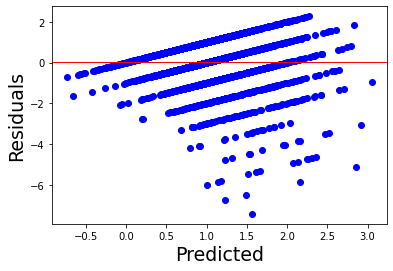

In [202]:
# residual plot
plt.scatter(p_pred, residuals, color = 'blue')
plt.ylabel('Residuals', fontsize = 19)
plt.xlabel('Predicted', fontsize = 19)
plt.axhline(y= residuals.mean(), color = 'r', linewidth = 1)
plt.show()

**observation**: There is no pattern hence no heteroskedasticity

In [207]:
#using the barlett's Test
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(p_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

401.6208055541013
the variances are homogeneous!


**Conclusion** The models used cannot accurately predict the goals scored by either team as the accuracy registered is too low thus unreliable.

### Approach 3: Logistic approach

*. determine from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



In [214]:
# importing libraries
#
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [225]:
#selecting the variable to use
model3=final_merge1[['status','home_team_score','away_team_score',	'tournament_type', 'home_team_rank', 'away_team-rank']]
model3.head()



,status,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
0,1,1,2,1,4,3
1,0,1,1,0,4,12
2,2,2,1,0,5,70
5,2,4,0,0,19,70
8,2,2,1,0,67,70


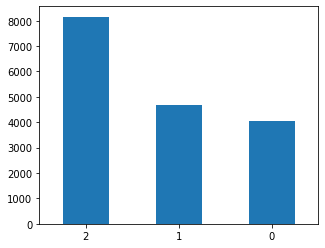

In [226]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (5, 4))
model3.status.value_counts().plot(kind = 'bar', rot = 0);

**observation**: from the above chart, the results are fairly balanced

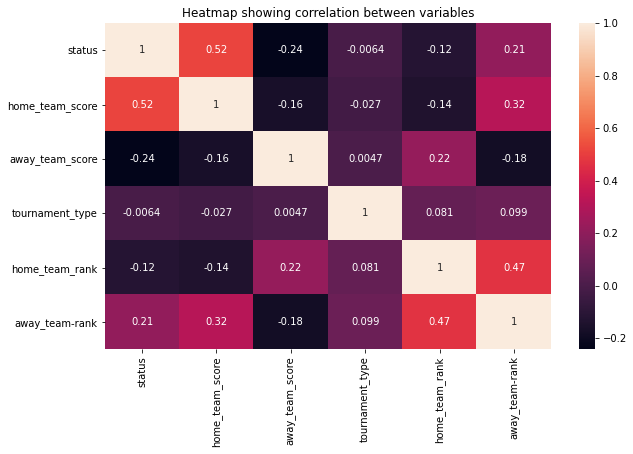

In [227]:
# Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(model3.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

**observation**: most of the variables are weakly correlated.



In [247]:
# Let's display the correlations between the variables
correlations = model3.corr()
correlations

,status,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
status,1.000000,0.518827,-0.241682,-0.006367,-0.115650,0.214046
home_team_score,0.518827,1.000000,-0.163737,-0.027374,-0.135345,0.318861
away_team_score,-0.241682,-0.163737,1.000000,0.004693,0.221738,-0.179911
tournament_type,-0.006367,-0.027374,0.004693,1.000000,0.081071,0.098640
home_team_rank,-0.115650,-0.135345,0.221738,0.081071,1.000000,0.469376
away_team-rank,0.214046,0.318861,-0.179911,0.098640,0.469376,1.000000


In [248]:
#plotting VIf score
#
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,status,home_team_score,away_team_score,tournament_type,home_team_rank,away_team-rank
status,1.422181,-0.667272,0.202997,-0.007262,0.070896,-0.087684
home_team_score,-0.667272,1.575782,-0.104131,0.062381,0.429171,-0.585959
away_team_score,0.202997,-0.104131,1.209236,-0.011937,-0.456133,0.422583
tournament_type,-0.007262,0.062381,-0.011937,1.014294,-0.019756,-0.111262
home_team_rank,0.070896,0.429171,-0.456133,-0.019756,1.639105,-1.001492
away_team-rank,-0.087684,-0.585959,0.422583,-0.111262,-1.001492,1.762686


**`observation`**: all VIF score is less than 5. thus we can't remove them.

In [231]:
# Spliting the data into features and the target variable
#
X = model3.drop(columns = ['status']).values
y = model3['status'].values

In [ ]:
# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [232]:
# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
# Making predictions
#
y_pred = logistic.predict(X_test)
y_pred 
a=pd.DataFrame({'actual': y_test, 'predicted': y_pred})
a.head()

,actual,predicted
25826,0,0
434,4,2
16680,4,2
9171,0,0
14655,0,0


In [243]:
# Evaluating the model

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[2009,    0,    0,    0,    0,    0,    0,    0,    4,    0,    0,
           0],
       [  54, 1503,   86,    0,    7,    0,    0,    0,   13,    0,    0,
           0],
       [   0,  411,  417,    0,   10,    0,    0,    0,    6,    0,    0,
           0],
       [   0,   40,  284,    0,    2,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    1,  128,    0,    0,    0,    0,    0,    1,    0,    0,
           0],
       [   0,    0,   39,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,   19,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,   17,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    4,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  

In [249]:
#Evaluating the performance of the model
#
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7766356987546946

In [250]:
# We will use the rmse score to evaluate 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.33998813994860644
Mean Squared Error: 0.8614350662186203
Root Mean Squared Error: 0.9281352628893164


**Conclusion**

The model has an accuracy of 77 % .

This shows the model is  fit to make predictions if the game is a Win, Lose or Draw. however we can look for other models.

 Challenging the solution

* we can try other models to see if we can get better predictions

* use hyperparameter tuning and apply to my models

* check the features to be used based on the importance of each feature.

## Follow up questions


1. Did we have the right data?

yes. thought there was no accurate score, this can be solved using different models

2. Do we need other data to answer our question?

Probably more data needs to be sought so as to improve the model and provide meaningful predictions.

3. Did we have the right question?

yes.